## **About the data that we are going to use**

<p style="color:black;font-size:23px;"><br><b>Haberman's Survival Dataset</b></p>
<br>
<p>This dataset contains information about the survival of patients who had undergone surgery for a breast cancer at the University of Chicago's Billings Hospital.
<br>
<br>
<b>Columns:</b>
<ol>
    <li>Age of patient at time of the operation</li>
    <li>Patient's year of operation</li>
    <li>Number of positive axillary nodes detected</li>
    <li>Survival status (class attribute)</li>
    <ul>    
        <li>1 = the patient survived 5 years or longer</li>
        <li>2 = the patient died within 5 year</li>
    </u>
</ol>
<br>
Link: <a href="https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival">Haberman's Survival Dataset</a>
</p>

## **Helpers**

In [1]:
class Balance:
    
    def __init__(self, data):
        self.data = data
    
    def equalizer(self):
        '''Rebalances dataset to have an equal number of data for both classes'''

        class_2 = self.data[self.data[:, -1] == 2]
        class_2_length = len(class_2)
        class_1 = self.data[self.data[:, -1] == 1][:class_2_length]
        
        new_data = np.vstack((class_2, class_1)) # Stacking the data with both classes
        
        return new_data

## **Training Neural Network**

In [2]:
import numpy as np
import pandas as pd

# Import our Neural Network
from network import NeuralNetwork

# To split dataset into training and test
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../Neural Network/data/haberman_csv.csv")

In [4]:
df.head()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_patient_at_time_of_operation           306 non-null int64
Patients_year_of_operation                    306 non-null int64
Number_of_positive_axillary_nodes_detected    306 non-null int64
Survival_status                               306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.describe()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
arr = np.array(df)

In [8]:
train, test = train_test_split(arr,
                               random_state=4, 
                               test_size=0.25)

**Rebalance the dataset**

In [9]:
balanced_data = Balance(train)

train = balanced_data.equalizer()

In [10]:
cols = train.shape[-1]

X_train, Y_train = train[:, :-1], train[:, -1]
X_test, Y_test = test[:, :-1], test[:, -1]


Y_train = Y_train.reshape(1, Y_train.shape[0])
X_train = X_train.T

Y_test = Y_test.reshape(1, Y_test.shape[0])
X_test = X_test.T

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3, 126)
(1, 126)
(3, 77)
(1, 77)


In [12]:
# So that Y consists of 0's and 1's
Y_train = Y_train - 1 
Y_test = Y_test - 1 

**Train a model**

In [13]:
network = NeuralNetwork(X_train, Y_train, 4)

0-th iteration Cost function is: 0.6930450132831534
1000-th iteration Cost function is: 0.6733752006937102
2000-th iteration Cost function is: 0.6324444149497934
3000-th iteration Cost function is: 0.6202983202537655
4000-th iteration Cost function is: 0.6168491465260753
5000-th iteration Cost function is: 0.6124700229435097
6000-th iteration Cost function is: 0.6103313758026009

Accuracy of the model on training data is: 0.6904761904761905


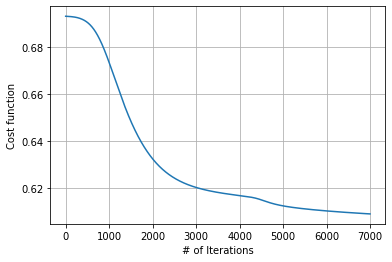

In [14]:
A2, weights = network.train_model(iters= 7000,lr=.003, plot_cost=True)

print()
print('Accuracy of the model on training data is: {}'.format(network.accuracy(A2)))

In [15]:
pred_y = network.predict(X_test, weights)
print('Accuracy of the model on test data is: {}'.format(network.accuracy(pred_y, Y_test)))

Accuracy of the model on test data is: 0.7792207792207793
